## Задание 1: Моделирование гаусс-шума

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

### Загрузка изображения

(-0.5, 509.5, 339.5, -0.5)

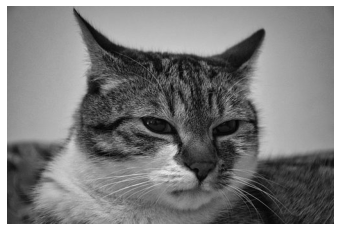

In [20]:
# Импортируем изображение
img = cv.imread('noise_generation_example.jpg', cv.cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.axis('off')

### Функция для получения массива с значениями и вероятностями распределений для метода Монте-Карло

In [9]:
def GetDistribution(sigma, nu, number) :
    values = np.linspace(0, 255, number)
    probabilities = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-np.power(values - nu, 2) / (2 * np.power(sigma, 2)))
    probabilities_sum = np.cumsum(probabilities * (255 - 0) / number)

    return np.stack((probabilities_sum, values), axis=-1)

### Функция для применения гаусс-шума к изображению

In [23]:
def GenerateGassianNoise(img: np.array, sigma, nu, percentage = 0.05):
    # Преобразуем к Python list из-за соображений производительности итерации
    img_list = img.tolist()
    number_of_noise_pixels = int(len(img_list) * len(img_list[0]) * percentage)
    distribution = GetDistribution(sigma, nu, 2000)

    for i in range(number_of_noise_pixels):
        index = int(random.uniform(0, len(img_list) * len(img_list[0])))
        random_uniform_value = random.uniform(0, 1)

        distribution_index = distribution[:,0].searchsorted(random_uniform_value * distribution[-1, 0])

        if distribution_index >= 2000:
            random_value = 255
        else:
            random_value = round(distribution[distribution_index, 1])

        img_list[index // img.shape[1]][index % img.shape[1]] += random_value

    return np.clip(img_list, 0, 255)

### Результат работы с 5% шумовых пикселей ($\sigma = 67.25$, $\mu = 127.5$)

(-0.5, 509.5, 339.5, -0.5)

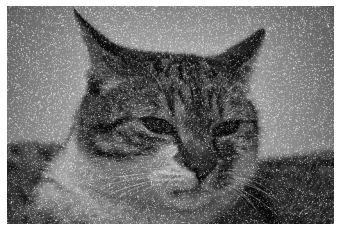

In [24]:
img_test1 = GenerateGassianNoise(img, 63.75, 127.5, 0.05)
plt.imshow(img_test1, cmap='gray')
plt.axis('off')

### Результат работы с 20% шумовых пикселей ($\sigma = 67.25$, $\mu = 127.5$)

(-0.5, 509.5, 339.5, -0.5)

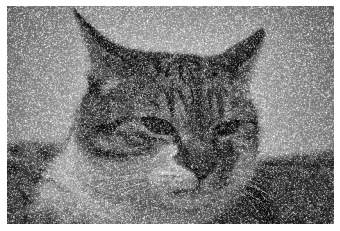

In [25]:
img_test2 = GenerateGassianNoise(img, 63.75, 127.5, 0.2)
plt.imshow(img_test2, cmap='gray')
plt.axis('off')